In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values

In [6]:
df.duplicated().sum()

0

There are no duplacated values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

all means are close to 66 and 68.05
all standard deviations are close between 14.6 and 15.9
While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17


In [10]:
print("Categories in gender variable    :",end="")
print(df["gender"].unique()) 
print("Categories in race_ethnicity variable    :",end="")
print(df["race_ethnicity"].unique()) 
print("Categories in parental_level_of_education variable    :",end="")
print(df["parental_level_of_education"].unique()) 
print("Categories in lunch variable    :",end="")
print(df["lunch"].unique()) 
print("Categories in test_preparation_course variable    :",end="")
print(df["test_preparation_course"].unique()) 

Categories in gender variable    :['female' 'male']
Categories in race_ethnicity variable    :['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable    :["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable    :['standard' 'free/reduced']
Categories in test_preparation_course variable    :['none' 'completed']


In [11]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print(numeric_features)
print(categorical_features)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding toal score column and Average score column in the data which can be used for target variables

In [12]:
df["Total_score"]=df["math_score"]+df["reading_score"]+df["writing_score"]
df["Average_score"]=df["Total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full=df[df["reading_score"]==100]["Total_score"].count()
writing_full=df[df["writing_score"]==100]["Total_score"].count()
maths_full=df[df["math_score"]==100]["Total_score"].count()
print("number of students with full marks in reading are",reading_full)
print("number of students with full marks in writing are",writing_full)
print("number of students with full marks in maths are", maths_full)

number of students with full marks in reading are 17
number of students with full marks in writing are 14
number of students with full marks in maths are 7


In [14]:
reading_full=df[df["reading_score"]<=20]["Total_score"].count()
writing_full=df[df["writing_score"]<=20]["Total_score"].count()
maths_full=df[df["math_score"]<=20]["Total_score"].count()
print("number of students with less than 20 marks in reading are",reading_full)
print("number of students with less than 20 marks in  writing are",writing_full)
print("number of students less than 20 marks in maths are", maths_full)

number of students with less than 20 marks in reading are 1
number of students with less than 20 marks in  writing are 3
number of students less than 20 marks in maths are 4


Students are weak in maths section and
Students are more stronger in reading section

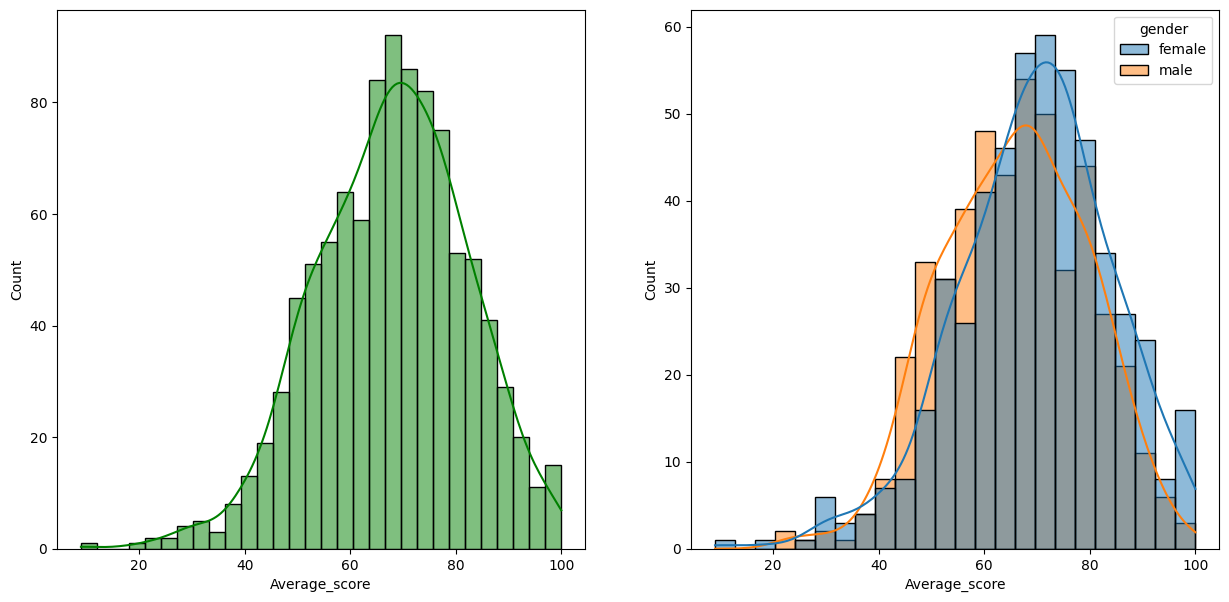

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average_score',kde=True,hue='gender')
plt.show()

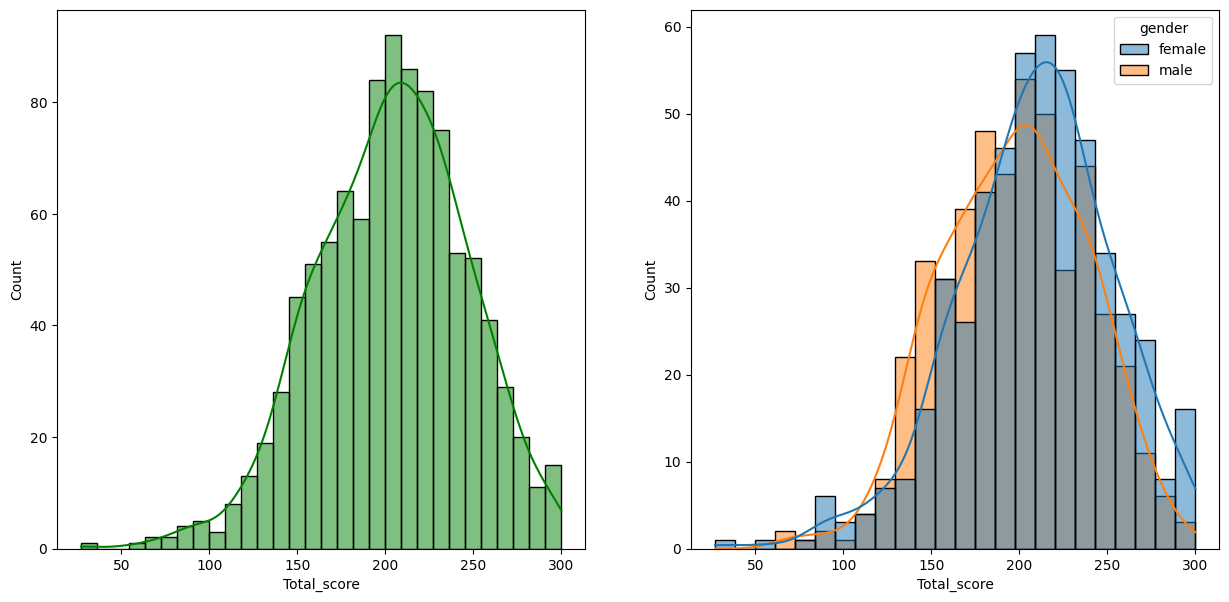

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')
plt.show()

most students are mostly secured around 200 to 220 and
Females are more tend to score more than men

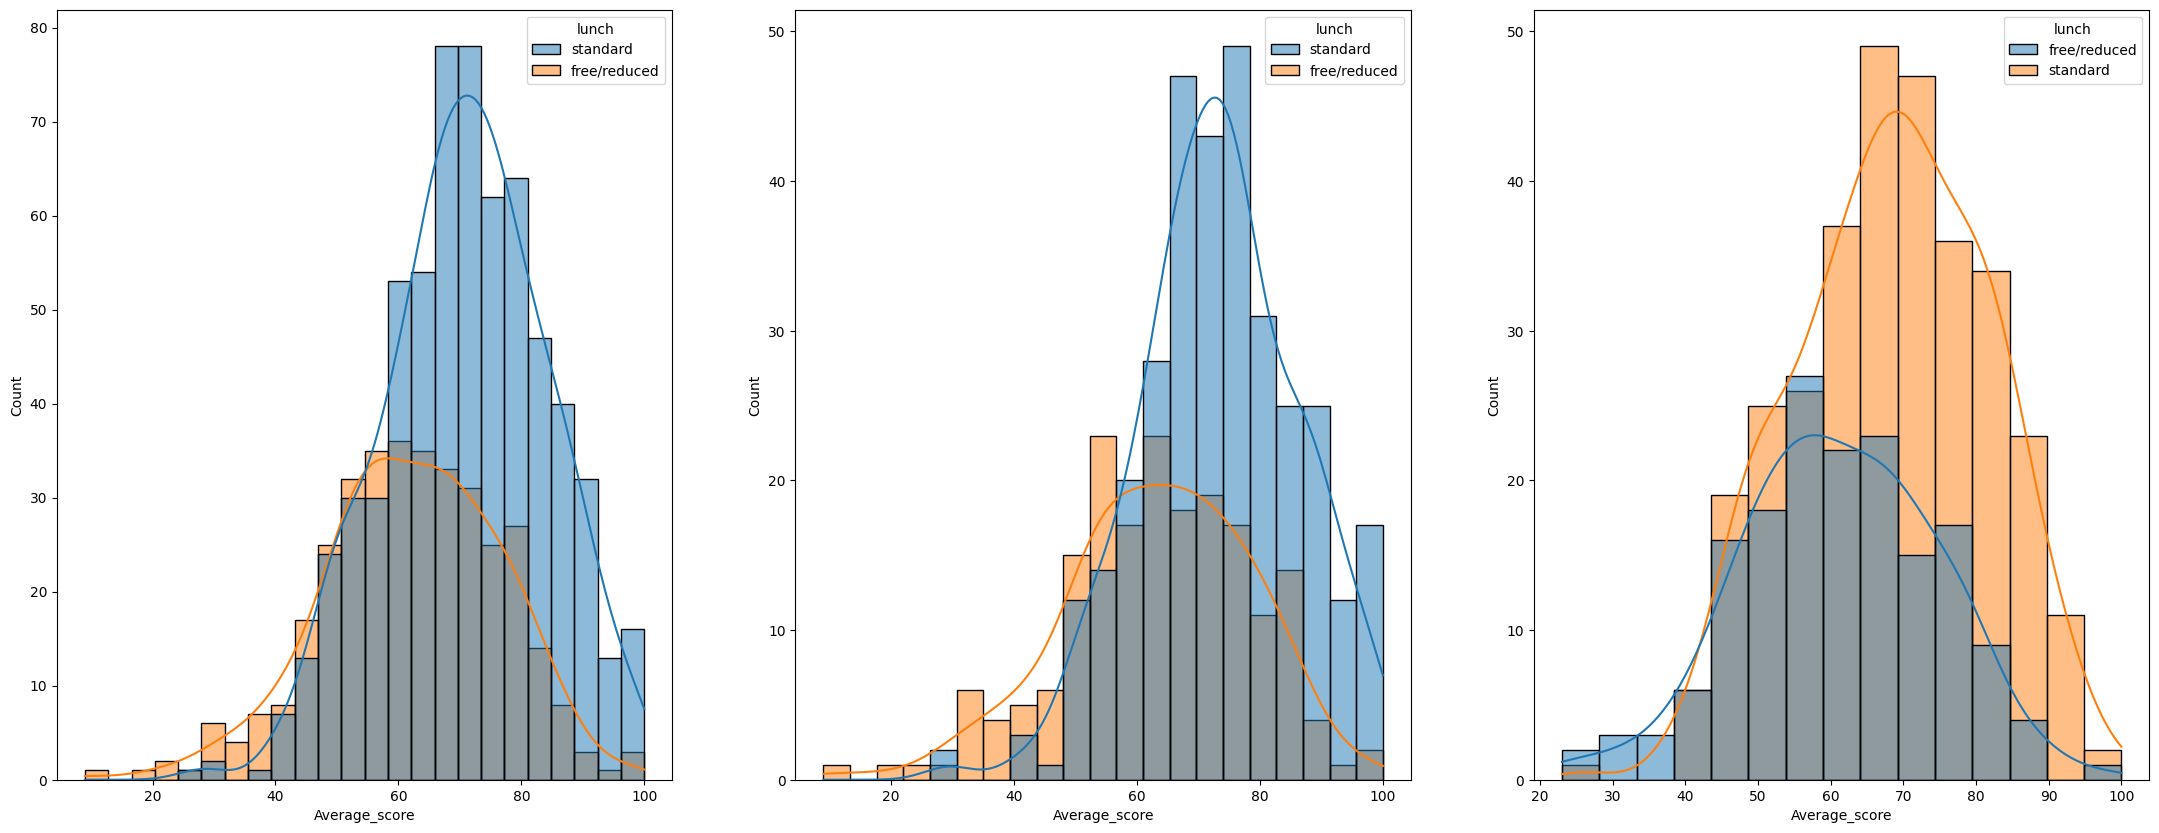

In [17]:
plt.subplots(1,3,figsize=(27,10))
plt.subplot(131)
sns.histplot(data=df,x='Average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='lunch')
plt.show()


1.Standard lunch students perform better

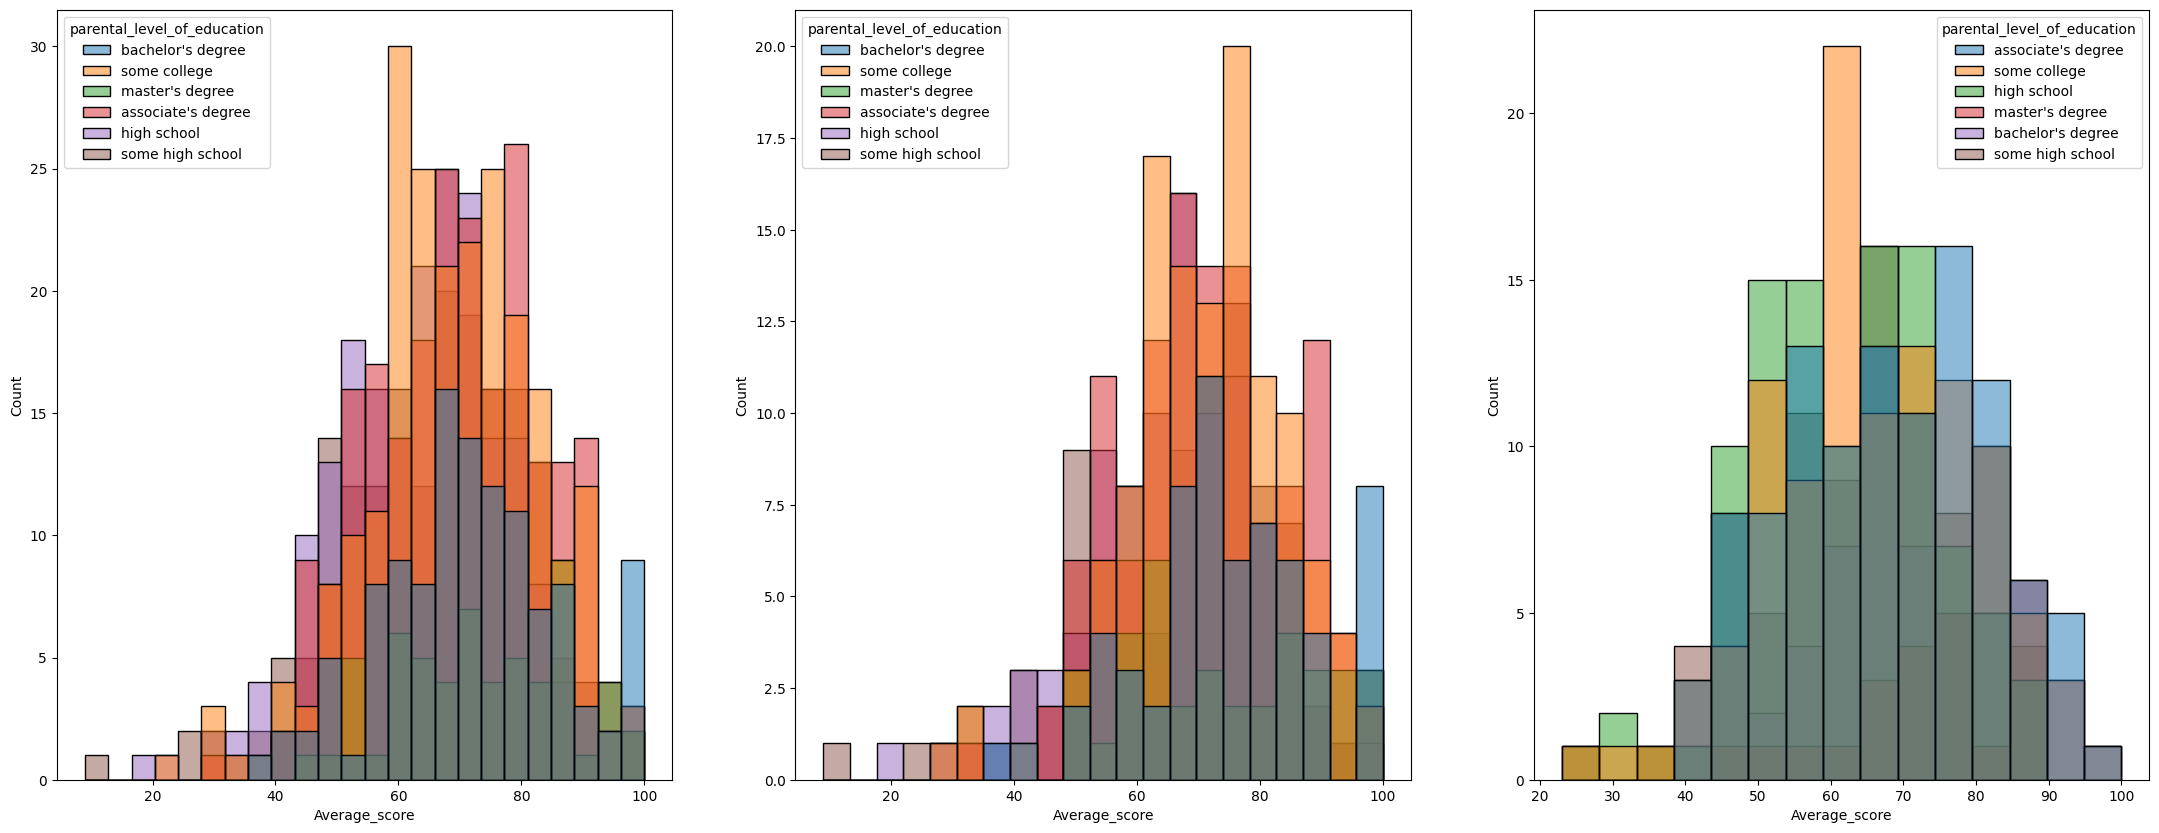

In [18]:
plt.subplots(1,3,figsize=(27,10))
plt.subplot(131)
sns.histplot(data=df,x='Average_score',kde=False,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=False,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=False,hue='parental_level_of_education')
plt.show()

1.Student parent's education don't help student perform well in exam.

2.2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3.3rd plot we can see there is no effect of parent's education on female students.

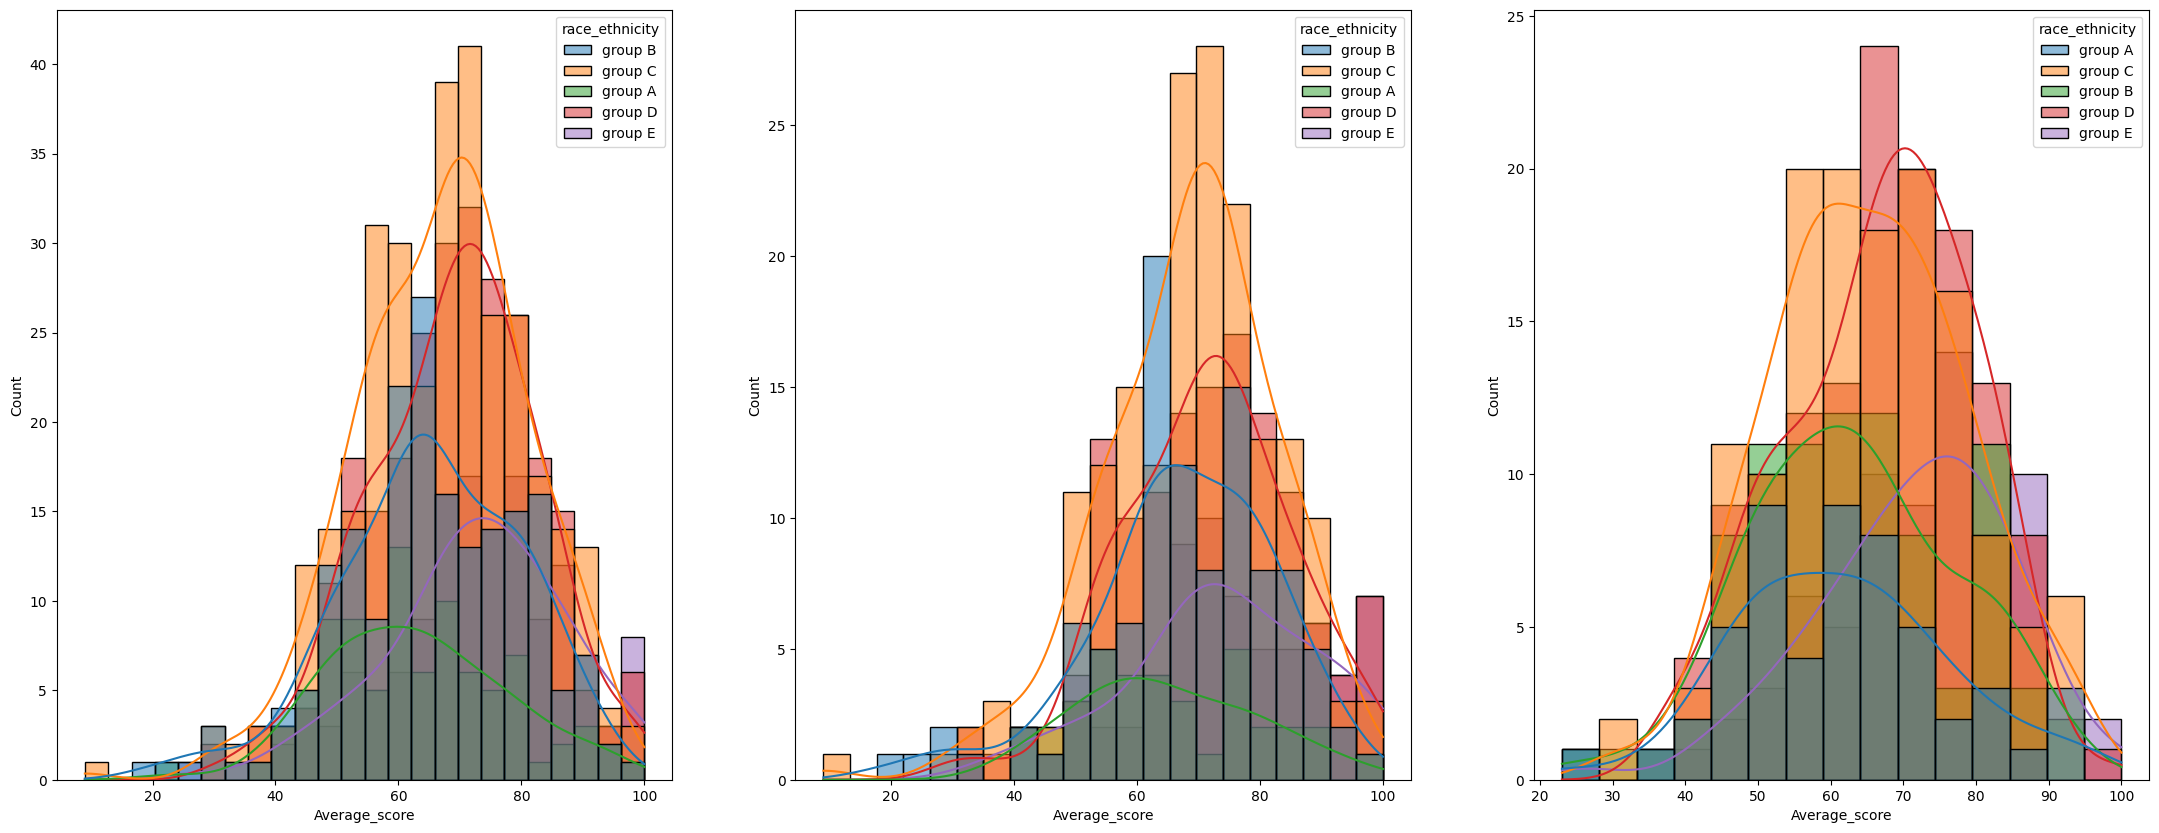

In [19]:
plt.subplots(1,3,figsize=(27,10))
plt.subplot(131)
sns.histplot(data=df,x='Average_score',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='race_ethnicity')
plt.show()

1.Group C students are tend to perform very well.

2.in males also , Group C students are tend to perform well.

3.But in Females,Group D has performed well

4.Students of group A and group B tends to perform poorly in exam.

5.Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

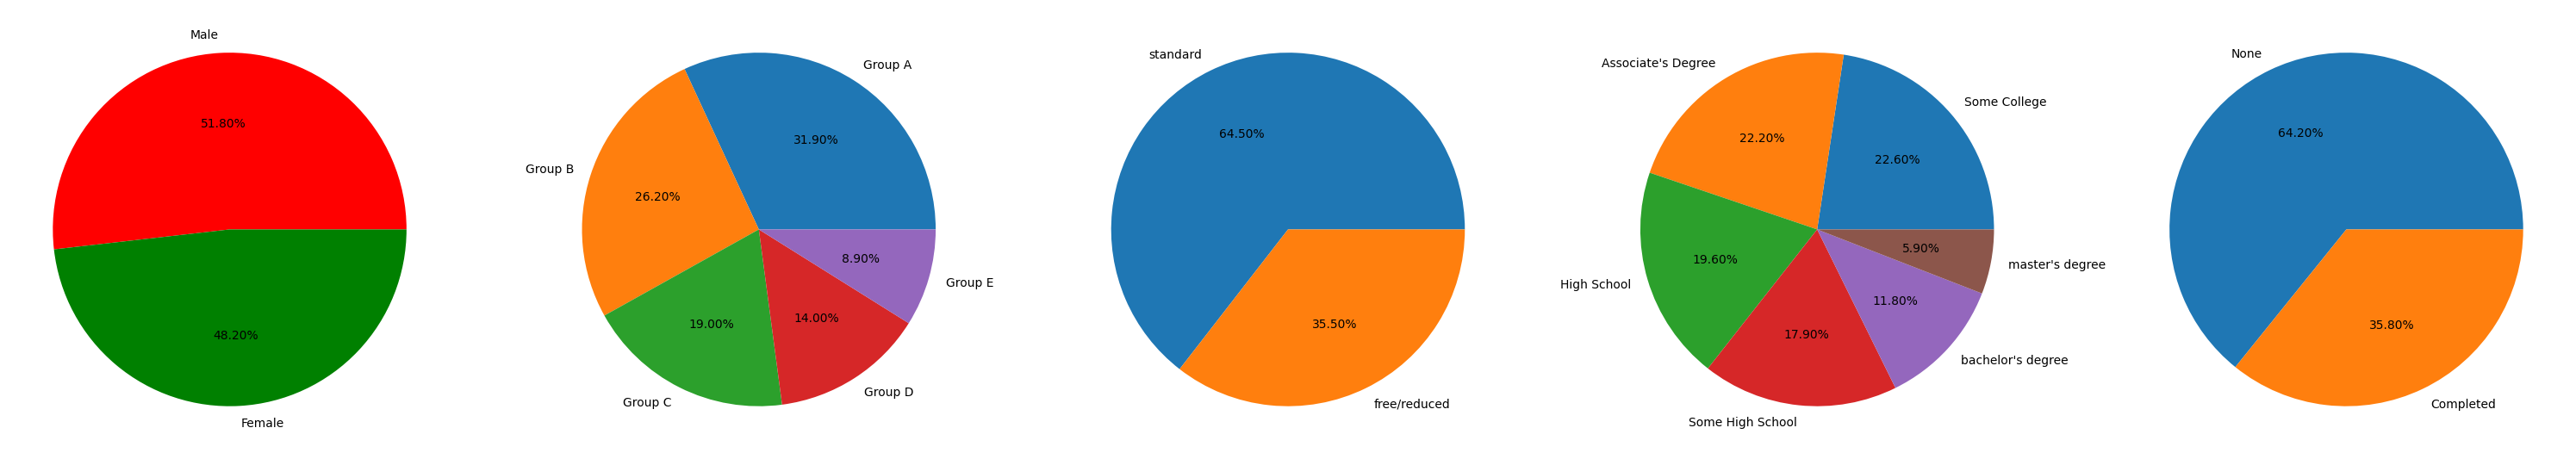

In [20]:
fig,ax=plt.subplots(1,5,figsize=(30,12))
plt.subplot(1,5,1)
plt.pie(df["gender"].value_counts(),colors=['red','green'],labels=["Male","Female"],autopct="%.2f%%")
plt.subplot(1,5,2)
plt.pie(df["race_ethnicity"].value_counts(),labels=["Group A","Group B","Group C","Group D","Group E"],autopct="%.2f%%")
plt.subplot(1,5,3)
plt.pie(df["lunch"].value_counts(),labels=["standard","free/reduced"],autopct="%.2f%%")
plt.subplot(1,5,4)
plt.pie(df["parental_level_of_education"].value_counts(),labels=['Some College', "Associate's Degree",'High School','Some High School',"bachelor's degree","master's degree"],autopct="%.2f%%")
plt.subplot(1,5,5)
plt.pie(df["test_preparation_course"].value_counts(),labels=['None', 'Completed'],autopct="%.2f%%")
plt.tight_layout()
plt.grid()
plt.show()


Insights:

1.Number of males and females are almost equal

2.Number of students are majority in group A

3.more students are opted for standard lunch

4.majority students did not completed test preparation course

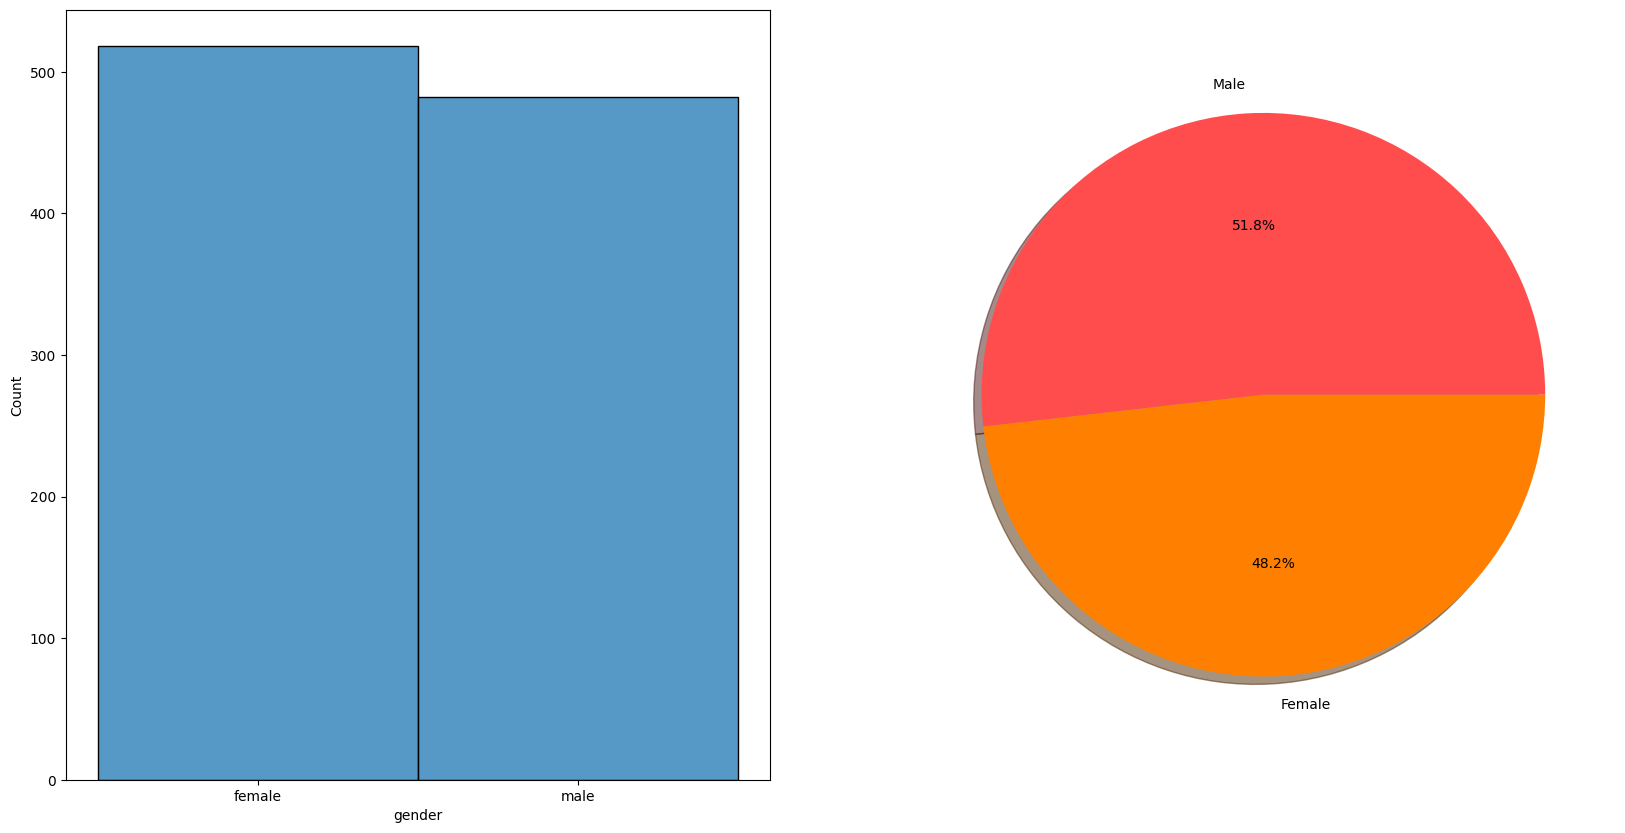

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.histplot(x=df['gender'],data=df,ax=ax[0])

    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [22]:

gender_group = df.groupby('gender').sum()
gender_group


,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
gender,,,,,,,,,
female,group Bgroup Cgroup Bgroup Bgroup Bgroup Bgrou...,bachelor's degreesome collegemaster's degreeas...,standardstandardstandardstandardstandardfree/r...,nonecompletednonenonecompletednonenonenonenone...,32962,37611,37538,108111,36037.000000
male,group Agroup Cgroup Bgroup Dgroup Cgroup Dgrou...,associate's degreesome collegesome collegehigh...,free/reducedstandardfree/reducedfree/reducedst...,nonenonenonecompletednonenonecompletednonecomp...,33127,31558,30516,95201,31733.666667


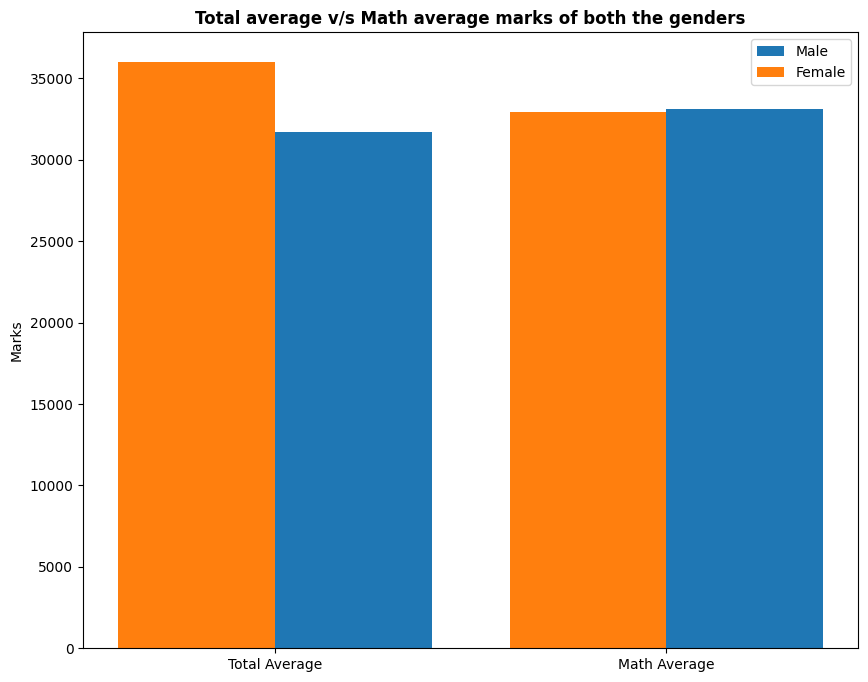

In [23]:
plt.figure(figsize=(10, 8))
X = ['Total Average','Math Average']
female_scores = [gender_group['Average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Average_score'][1], gender_group['math_score'][1]]
X_axis = np.arange(len(X))
plt.bar(X_axis+0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis-0.2 , female_scores, 0.4, label = 'Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

1.Girls performed well in Total Scores

2.Male students are tend to score more in maths.

Race/Ethnicity

In [24]:
Group_race=df.groupby('race_ethnicity')

In [25]:
df["race_ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

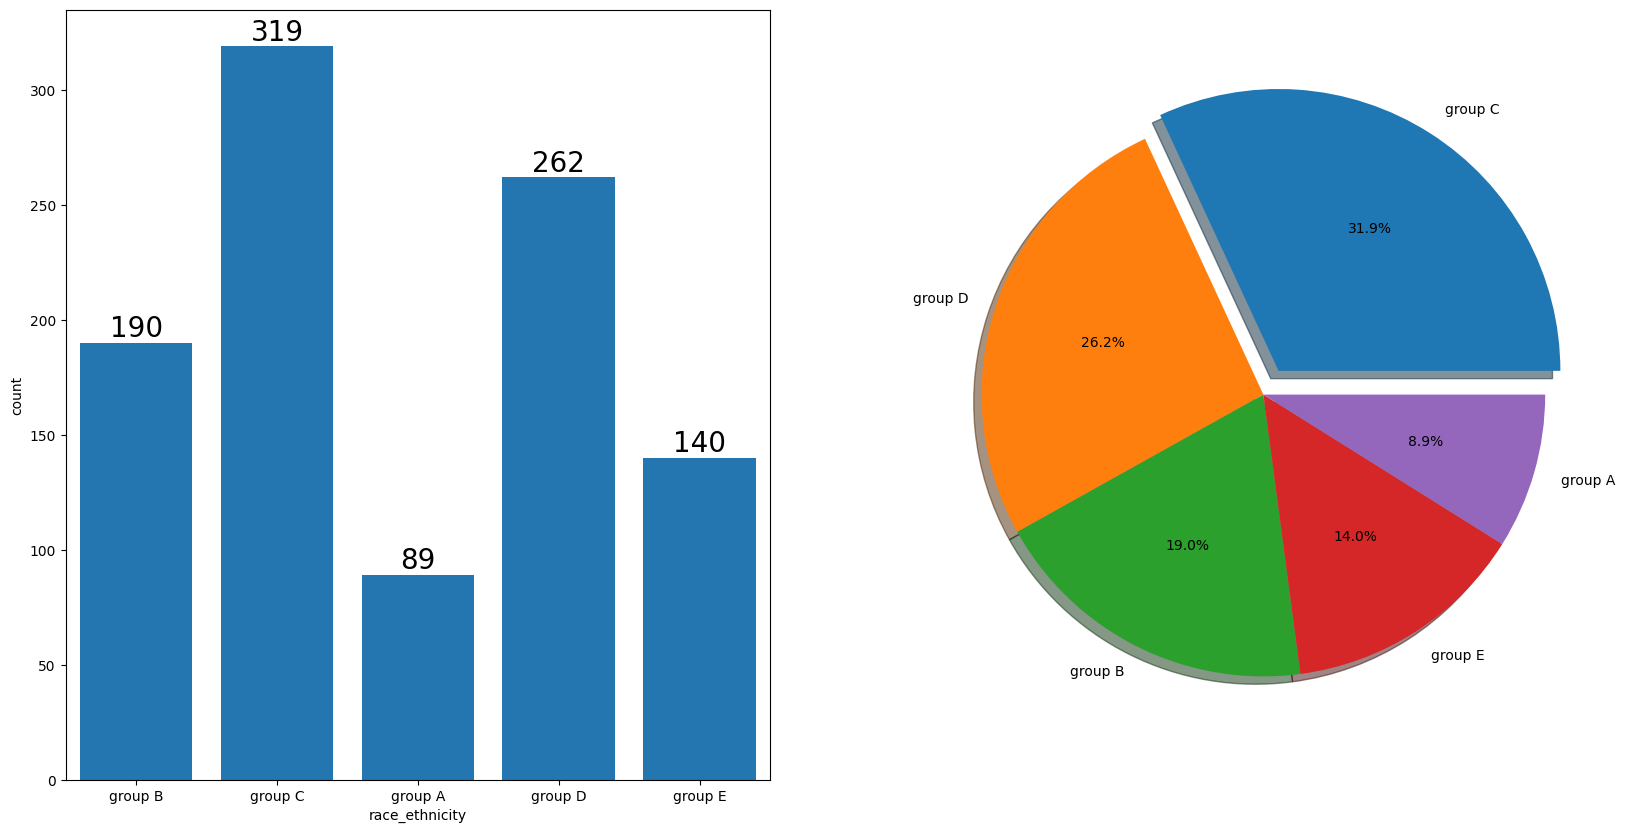

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

1.Most of the students are from Group C and Group D.

2.Lowest are from Group A

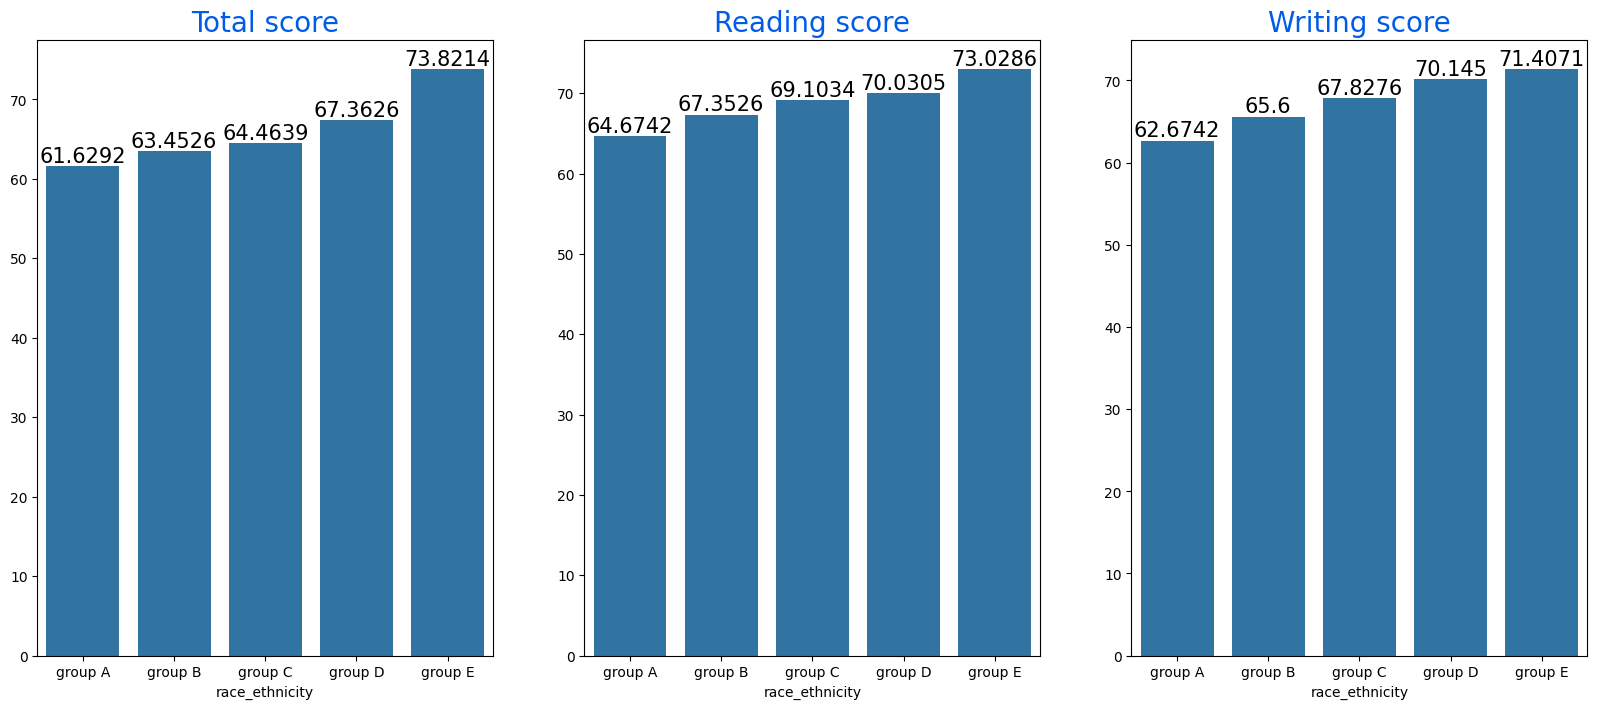

In [63]:

Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,ax=ax[0])
ax[0].set_title('Total score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


1.At Overall Group E performs well.

2.Group A seems to be not performing well.

Parental_level_of_education

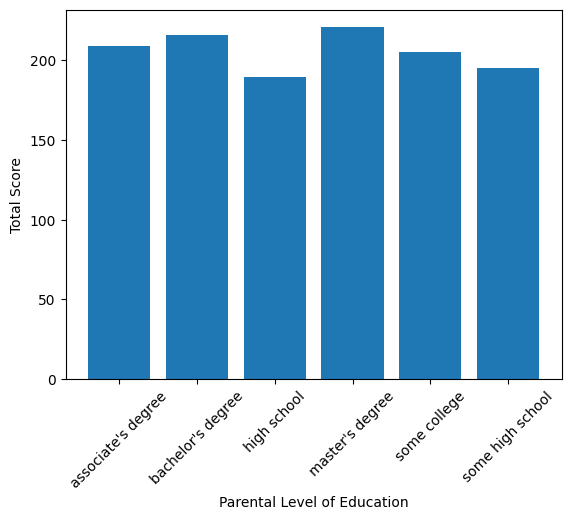

In [49]:
data_df = df.groupby('parental_level_of_education')['Total_score'].mean()
plt.bar(x=data_df.index, height=data_df.values)

plt.xlabel('Parental Level of Education')
plt.ylabel('Total Score')
plt.xticks(rotation=45)
plt.show()


1.The score of student whose parents possess master and bachelor level education are higher than others.

Lunch Column

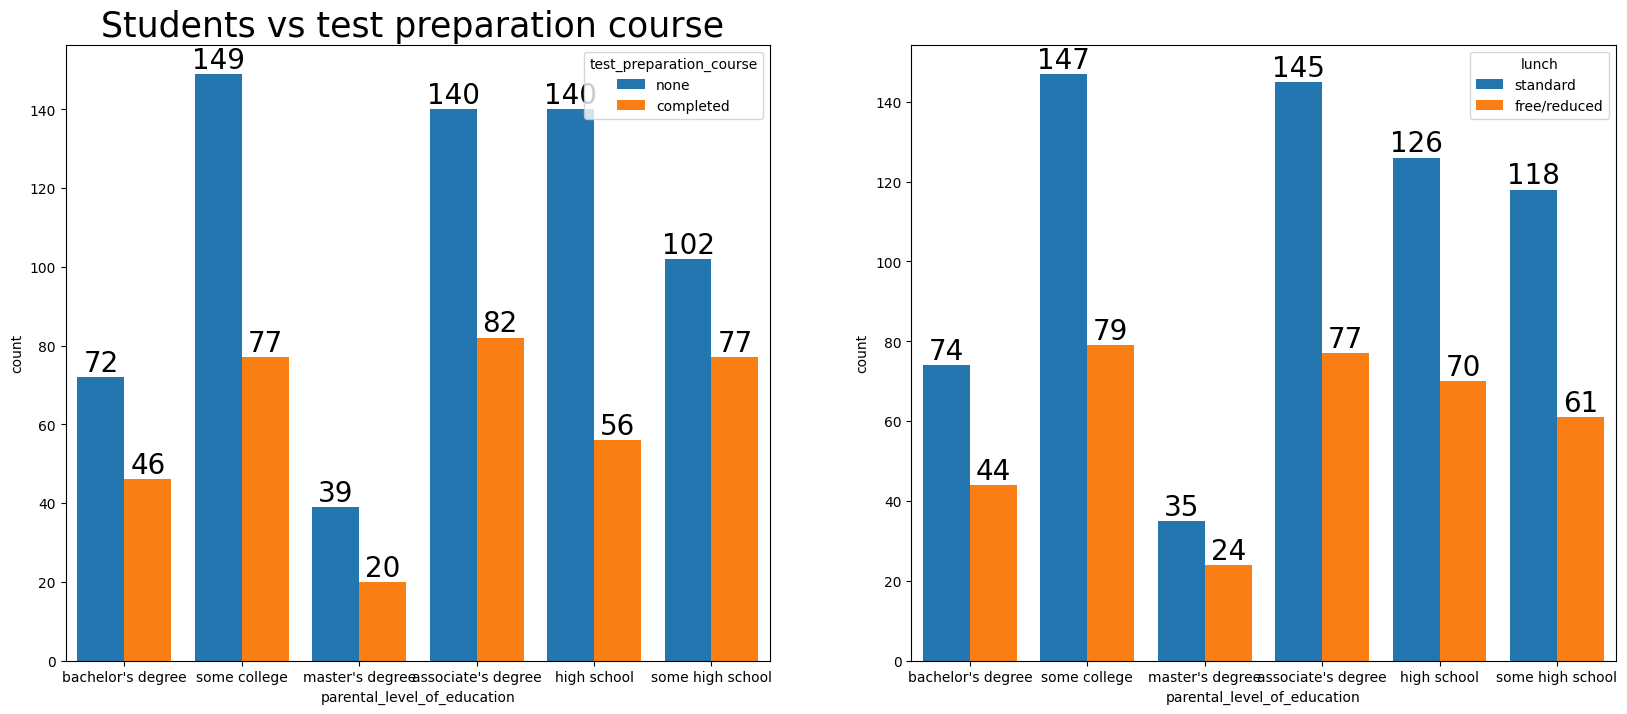

In [54]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

1.Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

<Axes: xlabel='lunch', ylabel='writing_score'>

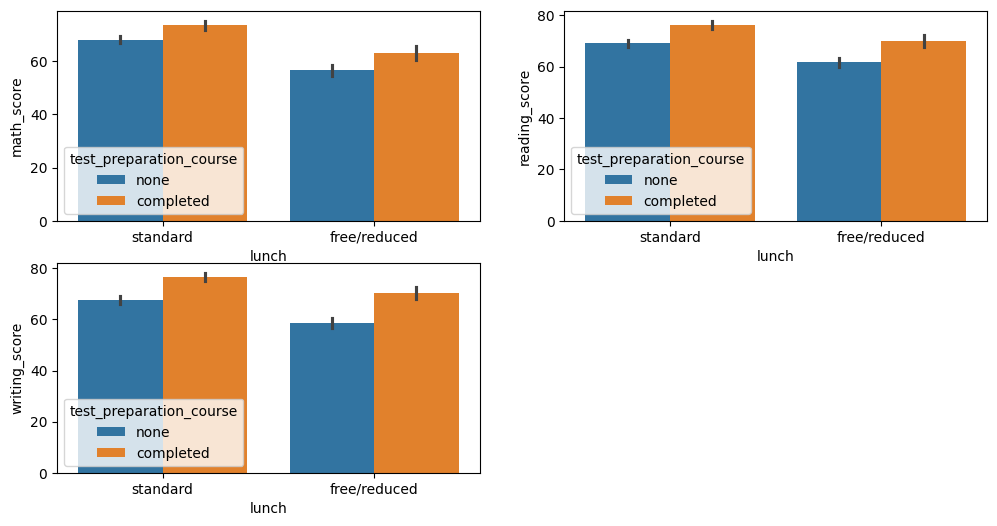

In [64]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

1.Students who get Standard Lunch tend to perform better than students who got free/reduced lunch


Check Outliers

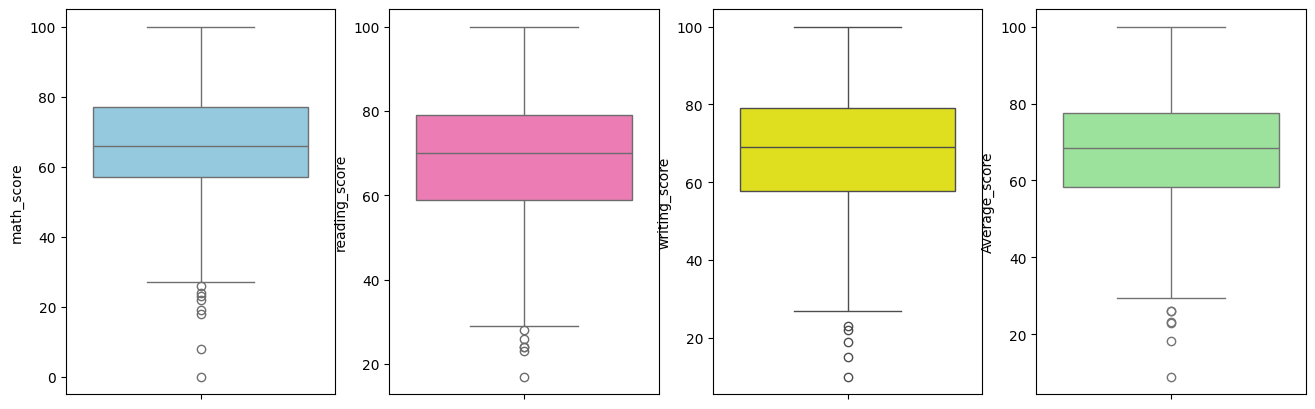

In [61]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average_score'],color='lightgreen')
plt.show()